In [1]:
from sklearn import svm
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style

def plot_hyperplane(linear_svm):
    w = linear_svm.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(4, 7)
    yy = a * xx - (linear_svm.intercept_[0]) / w[1]

    margin = 1 / np.sqrt(np.sum(linear_svm.coef_ ** 2))
    yy_down = yy - np.sqrt(1 + a ** 2) * margin
    yy_up = yy + np.sqrt(1 + a ** 2) * margin

    plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, **params)
    

style.use('ggplot')

# import source data
iris = load_iris()

# setup source dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['is_train'] = np.random.uniform(0, 1, len(df)) <= 0.75
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df['species_codes'] = df['species'].cat.codes

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),is_train,species,species_codes
0,5.1,3.5,1.4,0.2,True,setosa,0
1,4.9,3.0,1.4,0.2,True,setosa,0
2,4.7,3.2,1.3,0.2,True,setosa,0
3,4.6,3.1,1.5,0.2,False,setosa,0
4,5.0,3.6,1.4,0.2,True,setosa,0


In [3]:
# create training set
X_tr = df[df['is_train'] == True]
X_tr = pd.concat([X_tr[X_tr['species_codes'] == 0], X_tr[X_tr['species_codes'] == 1]])
y_tr = X_tr['species_codes']

# create testing set
X_tst = df[df['is_train'] == False]
X_tst = pd.concat([X_tst[X_tst['species_codes'] == 0], X_tst[X_tst['species_codes'] == 1]])
y_tst = X_tst['species_codes']

linear_svm = svm.SVC(kernel='linear')

linear_svm.fit(X_tr[['sepal length (cm)', 'sepal width (cm)']].values, y_tr.values)

print(linear_svm.coef_)

print(linear_svm.intercept_)

print(linear_svm.score(X_tr[['sepal length (cm)', 'sepal width (cm)']].values, y_tr.values))

[[ 2.22254788 -2.22228556]]
[-5.00158151]
1.0


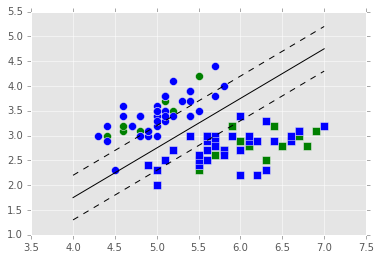

In [4]:
plt.scatter(X_tst[X_tst['species_codes'] == 0]['sepal length (cm)'], X_tst[X_tst['species_codes'] == 0]['sepal width (cm)'],
            marker='o', c='green', s=64)
plt.scatter(X_tst[X_tst['species_codes'] == 1]['sepal length (cm)'], X_tst[X_tst['species_codes'] == 1]['sepal width (cm)'],
            marker='s', c='green', s=64)

plt.scatter(X_tr[X_tr['species_codes'] == 0]['sepal length (cm)'], X_tr[X_tr['species_codes'] == 0]['sepal width (cm)'],
            marker='o', c='blue', s=64)
plt.scatter(X_tr[X_tr['species_codes'] == 1]['sepal length (cm)'], X_tr[X_tr['species_codes'] == 1]['sepal width (cm)'],
            marker='s', c='blue', s=64)

plot_hyperplane(linear_svm)

plt.show()

/usr/local/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


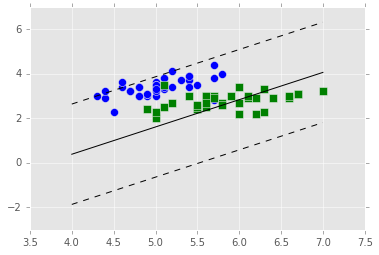

In [11]:
y_tr.iloc[0] = 1
y_tr.iloc[len(y_tr)-1] = 0

linear_svm_slack = svm.SVC(kernel='linear', C=0.02)

linear_svm_slack.fit(X_tr[['sepal length (cm)', 'sepal width (cm)']].values, y_tr.values)

plt.scatter(X_tr[X_tr['species_codes'] == 0]['sepal length (cm)'], X_tr[X_tr['species_codes'] == 0]['sepal width (cm)'],
            marker='o', c='blue', s=64)
plt.scatter(X_tr[X_tr['species_codes'] == 1]['sepal length (cm)'], X_tr[X_tr['species_codes'] == 1]['sepal width (cm)'],
            marker='s', c='green', s=64)

plot_hyperplane(linear_svm_slack)

plt.show()

In [12]:
print(linear_svm_slack.score(X_tr[['sepal length (cm)', 'sepal width (cm)']].values, y_tr))

0.684210526316


In [13]:
y_tr.iloc[0] = 0
y_tr.iloc[len(y_tr)-1] = 1

/usr/local/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [14]:
# create nonlinear svm
nonlinear_svm = svm.SVC(kernel='rbf', gamma=0.7, C=1.0)

# fit the data
nonlinear_svm.fit(X_tr[['sepal length (cm)', 'sepal width (cm)']].values, y_tr)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.7, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/usr/local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/usr/local/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


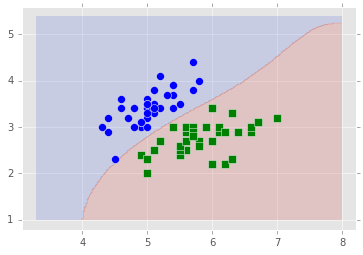

In [15]:
# create meshgrid for plotting decision boundaries
X0, X1 = X_tr['sepal length (cm)'], X_tr['sepal width (cm)']
xx, yy = make_meshgrid(X0, X1)

plot_contours(nonlinear_svm, xx, yy, cmap=plt.cm.coolwarm, alpha=0.2)

plt.scatter(X_tr[X_tr['species_codes'] == 0]['sepal length (cm)'], X_tr[X_tr['species_codes'] == 0]['sepal width (cm)'],
            marker='o', c='blue', s=64)
plt.scatter(X_tr[X_tr['species_codes'] == 1]['sepal length (cm)'], X_tr[X_tr['species_codes'] == 1]['sepal width (cm)'],
            marker='s', c='green', s=64)

plt.show()